In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

e:\FIAP\ProjetoMNSIT\.env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9046 - loss: 0.3149 - val_accuracy: 0.9882 - val_loss: 0.0425
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9861 - loss: 0.0439 - val_accuracy: 0.9877 - val_loss: 0.0433
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9900 - loss: 0.0312 - val_accuracy: 0.9863 - val_loss: 0.0541
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9931 - loss: 0.0214 - val_accuracy: 0.9888 - val_loss: 0.0375
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9953 - loss: 0.0141 - val_accuracy: 0.9922 - val_loss: 0.0365


In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Acurácia nos dados de teste: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9864 - loss: 0.0377
Acurácia nos dados de teste: 0.9901999831199646


In [7]:
num_train_images = len(x_train)
num_train_labels = len(y_train)

num_test_images = len(x_test)
num_test_labels = len(y_test)

# Exibir as quantidades
print(f"Conjunto de Treino: {num_train_images} imagens, {num_train_labels} rótulos.")
print(f"Conjunto de Teste: {num_test_images} imagens, {num_test_labels} rótulos.")

Conjunto de Treino: 60000 imagens, 60000 rótulos.
Conjunto de Teste: 10000 imagens, 10000 rótulos.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


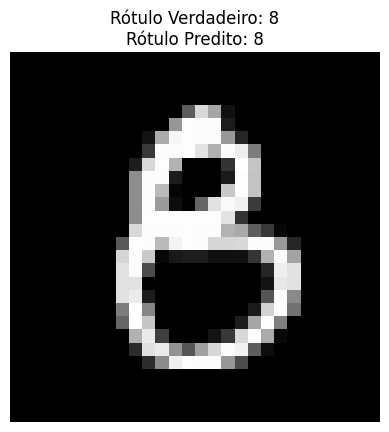

In [12]:
index = 800
test_image = x_test[index:index+1]
true_label = y_test[index]

# Fazer a predição com o modelo treinado
predicted_probabilities = model.predict(test_image)
predicted_label = predicted_probabilities.argmax() # Classe com maior probabilidade

# Exibir a imagem e os resultados
plt.imshow(x_test[index].reshape(28, 28), cmap='gray') # Exibir a imagem original
plt.title(f"Rótulo Verdadeiro: {true_label}\nRótulo Predito: {predicted_label}")
plt.axis('off')
plt.show()